<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/unibo-intensive-program-2024/blob/main/1-notebooks/chapter-05-01.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Advanced Clustering Techniques

## Spectral Clustering

### Introduction

- Spectral clustering is a technique used in machine learning to group data into clusters that may not be linearly separable. 

- It works by using the **eigenvalues** (spectra) of a **similarity matrix** of the data to perform dimensionality reduction before clustering in fewer dimensions. 

- The method is particularly effective for identifying clusters that are connected through a graph structure but are not necessarily compact or evenly distributed in space.

Here’s a step-by-step breakdown of how spectral clustering works:

1. **Similarity Matrix Creation**: The first step involves creating a similarity matrix that <span style="color:red;">represents how similar each pair of points in the dataset is to each other</span>. This is often done using the Gaussian (RBF) kernel to convert the Euclidean distances between data points into similarity scores.

<center>
    
<img src="./pics/ch-05-01-00.jpg" width="500" height="500">
</center>

2. **Graph Representation**: The similarity matrix is then used to represent the data as a graph, with data points as nodes and the similarities as weights on the edges between nodes.

<center>
    
<img src="./pics/ch-05-01-01.jpg" width="500" height="500">
</center>

3. **Laplacian Matrix**: From this graph, a Laplacian matrix is computed. The Laplacian is a matrix representation that captures the structure of the graph. It is used to find the minimum number of cuts needed to partition the graph into clusters.

<center>
    
<img src="./pics/ch-05-01-02.jpg" width="500" height="500">
</center>

4. **Eigenvalue Decomposition**: The next step involves computing the eigenvalues and eigenvectors of the Laplacian matrix. The eigenvectors corresponding to the smallest eigenvalues (except for the smallest one, which is always zero) are used. These eigenvectors are then stacked to form a new dataset with reduced dimensions.

<center>
    
<img src="./pics/ch-05-01-03.jpg" width="500" height="500">
</center>

5. **Clustering**: The reduced dataset is then clustered using a conventional algorithm like k-means. Since the data is now in a space where clusters are more distinguishable, k-means or similar algorithms can effectively identify the clusters.

<center>
    
<img src="./pics/ch-05-01-04.jpg" width="500" height="500">
</center>

6. **Assignment Back to Original Data**: Finally, points are assigned to clusters based on their membership in the reduced dimensional space.

Let's see in more details each point.

### What is a Similarity Matrix?

- The first step in spectral clustering, "Similarity Matrix Creation," is crucial as it lays the foundation for the entire clustering process. Let's delve into the details of this step. 

- A **similarity matrix**, sometimes also referred to as an affinity matrix, is a *square matrix* used to represent the similarity between each pair of points in a dataset. 

- In the context of spectral clustering, the dataset is typically comprised of multidimensional points, and **the goal is to measure how close or similar these points are to one another**. 

- The similarity matrix is **symmetric**, with its diagonal elements representing the similarity of each point with itself (usually the maximum similarity score) and off-diagonal elements representing the similarity between different points.

**How is the Similarity Matrix Created?**

1. **Calculating Pairwise Distances**: The process begins by calculating the pairwise distances between all points in the dataset. This is often done using Euclidean distance, which measures the straight-line distance between two points in Euclidean space. However, other distance metrics can also be used depending on the nature of the data and the specific requirements of the clustering task.

2. **Converting Distances to Similarities**: Directly using distances as measures of similarity is not intuitive because in a similarity context, we expect similar points to have a high score. Hence, the distances need to be converted into similarity scores. This conversion is typically achieved using a similarity function, such as the Gaussian (Radial Basis Function, RBF) kernel.

3. **Using the Gaussian (RBF) Kernel**: The Gaussian kernel is a popular choice for transforming Euclidean distances into similarity scores. It is defined as follows:

   $$ S(x, y) = \exp\left(-\frac{\|x - y\|^2}{2\sigma^2}\right) $$

- Here, $S(x, y)$ is the similarity between points $x$ and $y$, $\|x - y\|$ is the Euclidean distance between $x$ and $y$, and $\sigma$ is a parameter that controls the width of the neighborhood or the spread of the Gaussian kernel. 

- The effect of this transformation is that points closer to each other (smaller distances) result in higher similarity scores (closer to 1), while points further apart have lower scores (closer to 0).

**Key Considerations**

- **Choice of $\sigma$**: The parameter $\sigma$ plays a crucial role in determining the scale of similarity. Choosing an appropriate $\sigma$ is essential for the success of the clustering.
    - *A small $\sigma$ makes the similarity drop off quickly with distance, leading to a sparser similarity matrix where only very close points are considered similar*. 
    - *A larger $\sigma$ makes the similarity drop off more slowly, considering a broader range of points as similar*. 

- **Sparsity of the Matrix**: In practice, for large datasets, the similarity matrix can be made sparse by setting all similarity scores below a certain threshold to zero. This reduces the computational complexity and focuses on stronger relationships, assuming that very distant points (low similarity) do not contribute significantly to the clustering structure.

The similarity matrix creation is a foundational step in spectral clustering that impacts the quality and characteristics of the resulting clusters. By carefully transforming distances into similarities, this step effectively captures the underlying structure of the data, setting the stage for identifying clusters based on the global relationships among data points.

**Example**

For example, assume that we have the following dataset of 10 two-dimensional points:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

In [29]:
from sklearn.datasets import make_blobs

# Specify the center of the blob
center_point = [2, 8]

# Generating a blob centered around the specified point
XX, y = make_blobs(n_samples=10, centers=[center_point], cluster_std=1.0, random_state=42)

# Plotting the blob

#plt.figure(figsize=(8, 6))
#plt.scatter(XX[:, 0], XX[:, 1], c='blue', edgecolor='k', s=50)
#plt.scatter(center_point[0], center_point[1], c='red', marker='x', s=100, label='Center')
#plt.title('Scatter Plot of a Blob Centered Around a Given Point')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.grid(True)
#plt.legend()
#plt.show()

X4 = XX.tolist()

In [30]:
#X5 = generate_triangle_points(100)
#X5 = X5.tolist()

In [31]:
# only for test
import random
XX = []
YY = []
for i in range(0,10):
    x = random.randint(0,50)/10.0 
    XX.append(x)
    y = random.randint(60,95)/10.0 
    YY.append(y)
    
X1 = [[x, y] for x, y in zip(XX, YY)]

In [32]:
# only for test
XX = []
YY = []
for i in range(0,10):
    x = random.randint(0,30)/10.0 
    XX.append(x)
    y = random.randint(0,50)/10.0 
    YY.append(y)
    
X2 = [[x, y] for x, y in zip(XX, YY)]

In [33]:
# only for test
XX = []
YY = []
for i in range(0,10):
    x = random.randint(40,70)/10.0 
    XX.append(x)
    y = random.randint(10,50)/10.0 
    YY.append(y)
    
X3 = [[x, y] for x, y in zip(XX, YY)]    

In [34]:
# This array is constructed using the np.array() function from the NumPy library,
# with a shape of 10 rows and 2 columns
X = np.array([[0, 1], [1, 4], [1, 9], [2, 2], [2, 7],[3, 8], [4, 7], [5, 3], [6, 4], [7, 3]])

In [35]:
# Only for test
#X = X + X1 + X2 + X3 + X4

In [36]:
X = np.array(X)
print(X.shape)

(10, 2)


Let’s plot the dataset:

In [37]:
import seaborn as sns

>**NOTE** Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. It is designed to make visualization a central part of exploring and understanding data. Seaborn is built on top of matplotlib and integrates closely with pandas data structures, offering a more user-friendly and aesthetically pleasing interface compared to matplotlib. Seaborn does not replace matplotlib but rather complements it. While Seaborn simplifies many plotting tasks, matplotlib remains powerful for customizing plots down to the finest detail. Users often start with Seaborn for quick and attractive visualizations and then use matplotlib for fine-tuning.

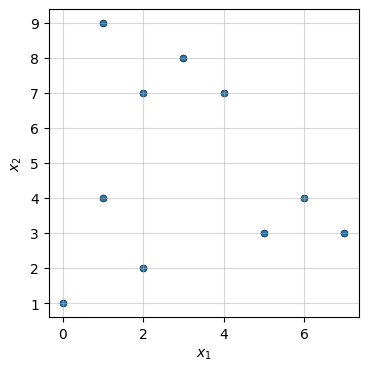

In [38]:
# Define a function named plot_data that takes a single argument, X, which is expected to be a 2D array or list.
def plot_data(X):
    # Create a new figure with a specified size of 4x4 inches for plotting.
    plt.figure(figsize=(4, 4))
    
    # Use seaborn's scatterplot function to plot the data points from X. 
    # X[:, 0] selects all rows from the first column of X (x-axis values),
    # and X[:, 1] selects all rows from the second column of X (y-axis values).
    # 'edgecolor' sets the color of the edges of each point to black ('k'),
    # 's' sets the size of the points to 20, and 'legend=False' omits the legend from the plot.
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', s=25, legend=False)    
    
    # Label the x-axis with the text '$x_1$'. The dollar signs are used to denote LaTeX formatting, emphasizing mathematical notation.
    plt.xlabel('$x_1$')
    # Label the y-axis with the text '$x_2$', also using LaTeX formatting for consistency.
    plt.ylabel('$x_2$')    
    # Add a grid to the plot for better readability, with the transparency (alpha) set to 0.5.
    plt.grid(alpha=0.5)

# Call the plot_data function, passing the previously defined array X as an argument.
# This will execute the function, resulting in the generation and display of the scatter plot.
plot_data(X)     

We now build a fully-connected similarity graph from this dataset, using the RBF similarity function. The adjacency matrix of this graph can be easily computed using the following Python function:

In [39]:
# Define the function similarity_graph with parameters X (the dataset) and sigma (the Gaussian kernel width parameter).
def similarity_graph(X, sigma):
    # Initialize a square matrix W of zeros with dimensions equal to the number of data points in X.
    # This matrix will store the computed similarities between each pair of data points.
    W = np.zeros((len(X), len(X)))
    
    # Iterate over all rows of X using index i to access each data point as the reference point.
    for i in range(len(X)):
        # Iterate over all rows of X again using index j to compare each data point with the reference point i.
        for j in range(len(X)):
            # Ensure that we are not comparing a data point with itself.
            if i != j:
                # Compute the Gaussian similarity between data points X[i] and X[j].
                # This is done by taking the Euclidean distance between the points, squaring it,
                # dividing by twice the square of sigma, and applying the exponential function.
                # The result is a similarity score that is high for close points and low for distant points.
                W[i, j] = np.exp(-np.sum((X[i] - X[j])**2) / (2 * sigma**2))
    
    # Return the computed similarity matrix W.
    return W

In [40]:
W = similarity_graph(X, 3)
print(np.round(W,3))

[[0.    0.574 0.027 0.757 0.108 0.04  0.056 0.2   0.082 0.053]
 [0.574 0.    0.249 0.757 0.574 0.329 0.368 0.389 0.249 0.128]
 [0.027 0.249 0.    0.062 0.757 0.757 0.486 0.056 0.062 0.018]
 [0.757 0.757 0.062 0.    0.249 0.128 0.2   0.574 0.329 0.236]
 [0.108 0.574 0.757 0.249 0.    0.895 0.801 0.249 0.249 0.103]
 [0.04  0.329 0.757 0.128 0.895 0.    0.895 0.2   0.249 0.103]
 [0.056 0.368 0.486 0.2   0.801 0.895 0.    0.389 0.486 0.249]
 [0.2   0.389 0.056 0.574 0.249 0.2   0.389 0.    0.895 0.801]
 [0.082 0.249 0.062 0.329 0.249 0.249 0.486 0.895 0.    0.895]
 [0.053 0.128 0.018 0.236 0.103 0.103 0.249 0.801 0.895 0.   ]]


### Graph Representation in Spectral Clustering

After creating the similarity matrix, which quantifies the similarity between every pair of data points in the dataset, the next step is to **interpret this matrix as a graph**. 

In this context, a graph is a mathematical structure used to model pairwise relations between objects. This step is crucial for understanding the data's structure from a new perspective, enabling the application of graph theory concepts to identify clusters.

1. **Nodes (Vertices)**: Each data point in the dataset is represented as a node (or vertex) in the graph. If you have $N$ data points, the graph will have $N$ nodes.

2. **Edges**: Connections between nodes are called edges. In the context of spectral clustering, an edge is drawn between every pair of nodes. The existence of an edge between two nodes indicates that there is some level of similarity between the corresponding data points.

3. **Weights**: Each edge in the graph is assigned a weight that quantifies the strength of the connection (or similarity) between the two nodes it connects. These weights are directly taken from the similarity matrix. <span style="color:red;">A higher weight indicates a stronger similarity between the nodes</span>. In the case of using the Gaussian (RBF) kernel for generating the similarity matrix, the weights would reflect the Gaussian similarity between data points, with closer points having higher weights.

<center>
    
<img src="./pics/ch-05-01-06.jpg">
</center>

**Understanding the Constructed Graph**

- **Type of Graph**: The resulting graph is typically **undirected** since the similarity between two points is mutual. It is also **fully connected** because the similarity matrix provides a similarity score for every pair of points, implying an edge between every pair of nodes.

- **Sparsity and Thresholding**: Although the initial representation suggests a fully connected graph, in practice, the graph can be made sparse by removing edges with weights below a certain threshold, keeping only the most significant connections. This sparsification helps in reducing computational complexity and focusing on the most meaningful relationships in the data.

- **Interpretation**: The graph effectively models the dataset's structure, with <span style="color:red;">clusters in the data expected to form tightly connected subgraphs</span>. In other words, <span style="color:blue;">points within the same cluster are highly interconnected with strong edges (high weights), while points from different clusters have weaker connections (low weights or no edge at all)</style>.

**Role in Spectral Clustering**

- This graph representation is fundamental to spectral clustering because it allows the application of graph-theoretic algorithms to detect communities or clusters. 

- The intuition is that <span style="color:red;">cutting the graph into subgraphs (clusters) can be done in such a way that the connections (edges) between different clusters are weak (low similarity), while connections within a cluster are strong (high similarity)</span>.

<center>
    
<img src="./pics/ch-05-01-07.jpg">
</center>

### What is the Laplacian Matrix?

- Step 3 of the spectral clustering process involves the computation of the Laplacian matrix from the graph constructed in Step 2. 

- In particular, the graph's structure is analyzed using eigendecomposition of the Laplacian matrix derived from the graph, which ultimately leads to the identification of clusters based on the spectral properties of the graph.

- This graph-based approach enables spectral clustering to identify clusters that may not be linearly separable and might have complex shapes, leveraging the topology of the data represented by the graph.

- The Laplacian matrix is a crucial concept in graph theory and spectral clustering, in a nutshell it is a matrix representation that captures the graph's structure, focusing on how nodes (data points) are connected to each other via edges (similarities).

**How is the Laplacian Matrix Computed?**

Given a graph $G$ with $N$ nodes, represented by its weighted adjacency matrix $W$ (**the similarity matrix from Step 1**), and a degree matrix $D$ (a diagonal matrix where each diagonal element $D_{ii}$ represents the sum of the weights of all edges connected to node $i$), the Laplacian matrix $L$ is computed as follows:

$$ L = D - W $$

Here’s what each component represents:

- **Weighted Adjacency Matrix ($W$)**: This matrix represents the graph, where each element $W_{ij}$ is the weight of the edge between nodes $i$ and $j$. If $i$ and $j$ are not directly connected, $W_{ij} = 0$.

- **Degree Matrix ($D$)**: This is a diagonal matrix where each entry $D_{ii}$ is the degree of node $i$, which, in the context of weighted graphs, is the **sum of the weights of all edges connected to node $i$**. In mathematical terms, $D_{ii} = \sum_{j} W_{ij}$.

<center>
    
<img src="./pics/ch-05-01-05.jpg" height=700 width=700>
</center>

**Variants of the Laplacian Matrix**

There are primarily two variants of the Laplacian matrix used in spectral clustering:


- **Unnormalized Laplacian ($L$)**: As defined above, $$L = D - W$$.

- **Normalized Laplacian**: There are two forms of the normalized Laplacian:

  **Symmetric Normalized Laplacian**: $$L_{sym} = D^{-1/2} L D^{-1/2} = I - D^{-1/2} W D^{-1/2}$$
  **Random Walk Normalized Laplacian**: $$L_{rw} = D^{-1} L = I - D^{-1} $$
  
In these formulas, $I$ denotes the identity matrix.

**Role and Significance**

- **Capturing Graph Structure**: The Laplacian matrix highlights the differences in connectivity within the graph. It effectively captures how each node differs from its neighbors in terms of connectivity, which is essential for identifying separations or cuts in the graph.

- **Spectral Clustering**: The eigenvalues and eigenvectors of the Laplacian matrix reveal critical information about the graph's cluster structure. Specifically, the number of zero eigenvalues of $L$ corresponds to the number of connected components in the graph. ***The eigenvectors associated with the smallest non-zero eigenvalues (known as Fiedler values) provide the means to partition the graph***. By analyzing these eigenvectors, spectral clustering algorithms can identify the minimum number of cuts needed to separate the graph into disjoint clusters, ensuring that the separation minimizes the similarity between different clusters while maximizing the similarity within clusters.

- **Partitioning**: The process of using the Laplacian's eigenvectors to partition the graph is based on the insight that these eigenvectors can serve as coordinates in a new space where clustering algorithms like k-means can be effectively applied to identify clusters.

The Laplacian matrix is a powerful tool in spectral clustering, bridging the gap between graph theory and clustering by leveraging the graph's spectral properties to discover inherent cluster structures in the data.

**Example**

Let's compute the Degree Matrix:

In [41]:
def degree_matrix(W):
    D = np.zeros_like(W)
    for i in range(len(W)):
        D[i, i] = np.sum(W[i])
    return D

In [42]:
D = degree_matrix(W)
print(np.round(D, 3))

[[1.896 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    3.618 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    2.475 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    3.293 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    3.986 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    3.596 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    3.928 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    3.751 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    3.497 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    2.585]]


We can now derive the graph Laplacian matrix, which is defined as the difference between the degree matrix and the adjacency matrix:

In [43]:
L = D - W
print(np.round(L, 3))

[[ 1.896 -0.574 -0.027 -0.757 -0.108 -0.04  -0.056 -0.2   -0.082 -0.053]
 [-0.574  3.618 -0.249 -0.757 -0.574 -0.329 -0.368 -0.389 -0.249 -0.128]
 [-0.027 -0.249  2.475 -0.062 -0.757 -0.757 -0.486 -0.056 -0.062 -0.018]
 [-0.757 -0.757 -0.062  3.293 -0.249 -0.128 -0.2   -0.574 -0.329 -0.236]
 [-0.108 -0.574 -0.757 -0.249  3.986 -0.895 -0.801 -0.249 -0.249 -0.103]
 [-0.04  -0.329 -0.757 -0.128 -0.895  3.596 -0.895 -0.2   -0.249 -0.103]
 [-0.056 -0.368 -0.486 -0.2   -0.801 -0.895  3.928 -0.389 -0.486 -0.249]
 [-0.2   -0.389 -0.056 -0.574 -0.249 -0.2   -0.389  3.751 -0.895 -0.801]
 [-0.082 -0.249 -0.062 -0.329 -0.249 -0.249 -0.486 -0.895  3.497 -0.895]
 [-0.053 -0.128 -0.018 -0.236 -0.103 -0.103 -0.249 -0.801 -0.895  2.585]]


### Eigenvalue Decomposition

In Step 4 the structural properties encoded in the Laplacian matrix are used to transform the data into a form where clusters can be easily identified. Remember that **Eigenvalue Decomposition** is a method of decomposing a matrix into its constituent parts in such a way that it reveals the matrix's intrinsic properties. For a square matrix $A$, the decomposition finds eigenvalues $\lambda$ and eigenvectors $v$ that satisfy the equation:

$$ A v = \lambda v $$

In the context of spectral clustering, $A$ is the Laplacian matrix $L$.

<center>
    
<img src="./pics/ch-05-01-09.jpg"  width="700" height="700">
</center>

**Role in Spectral Clustering**

1. **Computing Eigenvalues and Eigenvectors**: The first step is to compute the eigenvalues and eigenvectors of the Laplacian matrix $L$. The eigenvalues give a spectrum that represents the graph's connectivity, and the corresponding eigenvectors provide directions along which the graph can be "cut" to form clusters.

2. **Selection of Eigenvectors**: The eigenvalues are sorted from smallest to largest. The smallest eigenvalue is typically zero (or close to zero for numerical reasons) and corresponds to a constant eigenvector (due to the graph's connectedness). This eigenvalue and its corresponding eigenvector are generally discarded because they do not contribute to distinguishing between clusters (see [this blog](https://medium.com/@roiyeho/spectral-clustering-50aee862d300) for a proof of this result).

3. **Dimensionality Reduction**: ***The next few smallest eigenvalues and their corresponding eigenvectors are selected***. These eigenvectors are critical because they capture the most significant structure of the data as encoded in the graph. By stacking these eigenvectors column-wise, we form a new dataset. Each row of this new dataset represents the original data points, but now they are expressed in terms of these eigenvectors.

4. **Creating a Low-Dimensional Representation**: The process effectively transforms the original high-dimensional data into a lower-dimensional space. The dimensionality of this new space is determined by the number of selected eigenvectors. This transformed dataset is easier to cluster because the transformation has teased apart the clusters along the dimensions defined by the eigenvectors.

**Significance of the Eigenvectors**

- The selected eigenvectors serve as a basis for a new feature space where the clustering structure of the data is more apparent. Points that are part of the same cluster in the original space will be closer together in this new space, making traditional clustering techniques like k-means more effective.

- This transformation is possible because the eigenvectors corresponding to the smallest non-zero eigenvalues capture the slowest changes in the graph's connectivity. In other words, they highlight the broadest separations between clusters, where cutting the graph would incur the smallest "cost" in terms of disconnectedness.

**Practical Implications**

- This step is where the "spectral" in spectral clustering truly comes into play, as it leverages the spectrum (eigenvalues) of the Laplacian matrix to find a meaningful representation of the data. The process ensures that the inherent cluster structure, possibly obscured in the original high-dimensional space, becomes evident, facilitating the final clustering step.

**Example**

Let’s find the eigenvalues and eigenvectors of our Laplacian matrix, and sort them by increasing order of the eigenvalues:

In [44]:
eigen_vals, eigen_vecs = np.linalg.eig(L)

# Sort the eigenvectors by their corresponding eigenvalues
sorted_idx = np.argsort(eigen_vals)
eigen_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[:, sorted_idx]

print(np.round(eigen_vals, 3))

[0.    1.547 1.822 3.253 3.609 4.001 4.278 4.576 4.707 4.833]


In [45]:
print(np.round(eigen_vecs, 3))

[[-0.316 -0.665  0.467  0.384  0.291  0.08  -0.009  0.023  0.013  0.015]
 [-0.316 -0.1    0.135 -0.366 -0.216 -0.33  -0.712 -0.043 -0.161 -0.218]
 [-0.316  0.494  0.33   0.526 -0.48   0.169 -0.042 -0.007  0.013 -0.096]
 [-0.316 -0.282  0.064 -0.384 -0.534 -0.075  0.58  -0.197  0.048  0.024]
 [-0.316  0.242  0.138 -0.158  0.179 -0.159 -0.081  0.021  0.297  0.803]
 [-0.316  0.318  0.137 -0.128  0.413 -0.147  0.314  0.03  -0.679 -0.108]
 [-0.316  0.215  0.015 -0.181  0.361  0.019  0.108 -0.022  0.633 -0.526]
 [-0.316 -0.093 -0.292 -0.115 -0.099  0.371 -0.028  0.801 -0.055  0.023]
 [-0.316 -0.034 -0.375 -0.034  0.097  0.612 -0.184 -0.56  -0.135  0.089]
 [-0.316 -0.095 -0.621  0.455 -0.011 -0.54   0.055 -0.045  0.026 -0.007]]


In [46]:
import pandas as pd
# Convert the NumPy matrix to a pandas DataFrame
df = pd.DataFrame(eigen_vecs)

# Export the DataFrame to an Excel file
# Ensure you have 'openpyxl' installed for this to work with '.xlsx' files
df.to_excel('matrix_export.xlsx', index=False, header=False, engine='openpyxl')

The second eigenvector, which corresponds to the second smallest eigenvalue, is called the Fiedler vector. This vector can be used to split the graph into two sets of nodes: C₁ = {v₁, v₂, v₄, v₈, v₉, v₁₀}, which have a negative value in this vector, and C₂ = {v₃, v₅, v₆, v₇}, which have a positive value in this vector.

In [47]:
print("\nFirst Splitting\n")
c = np.where((eigen_vecs < 0))
for k  in range(len(c[0])):
    if c[1][k] ==1 :
        print(c[0][k]+1)
print("\nSecond Splitting\n")
c = np.where((eigen_vecs > 0))
for k  in range(len(c[0])):
    if c[1][k] ==1 :
        print(c[0][k]+1)


First Splitting

1
2
4
8
9
10

Second Splitting

3
5
6
7


We can further use the third eigenvector, which corresponds to the third smallest eigenvalue, to split C₁ into two sub-clusters: C₁₁ = {v₁, v₂, v₄}, where the nodes have a positive value in this vector, and C₁₂ = {v₈, v₉, v₁₀}, where the nodes have a negative value in this vector. Using the second and third eigenvectors of the Laplacian we are able to detect the natural clustering of the data points.

### Clustering

This step is where the actual grouping of data points into clusters occurs. After transforming the dataset into a lower-dimensional space using the eigenvectors of the Laplacian matrix (as described in Step 4), the structure of the data is now more conducive to clustering. 

**Preparing the Data for Clustering**

- **New Feature Space**: The eigenvectors selected in the previous step form a new dataset where each data point is represented in the reduced dimensional space. This space is constructed specifically to highlight the separation between clusters that was implicit in the original data's graph structure.

- **Rows as Points**: Each row of the new dataset (formed by stacking the selected eigenvectors) represents an original data point, but now encoded in terms of the principal components of the graph's structure. In this space, data points that belong to the same cluster in the original dataset are expected to be closer together, making them more distinguishable by clustering algorithms.

**Applying a Clustering Algorithm**

- **Choosing an Algorithm**: The most common algorithm used at this stage is k-means because of its simplicity and effectiveness. However, other clustering algorithms can also be applied depending on the specific characteristics of the data or the requirements of the task.

- **Number of Clusters**: The number of clusters, $k$, to be used by the clustering algorithm can be determined based on prior knowledge about the data, or by using methods such as the silhouette score, the elbow method, or other heuristic techniques to estimate the optimal $k$.

- **Execution**: The chosen clustering algorithm is applied to the dataset in the reduced dimensional space. Because the transformation has already enhanced the cluster structure, the algorithm can more easily identify and assign the data points to their respective clusters.

**Outcome**

- **Cluster Labels**: The result of this clustering step is a set of labels that indicate the cluster membership for each data point in the original dataset. These labels can then be used for further analysis, visualization, or as input for other machine learning tasks.

- **Interpretation**: The clusters identified in this lower-dimensional space correspond to groups of points that are similar according to the graph structure of the original data. This means that even if the original features did not clearly delineate clusters, the spectral clustering process has revealed the underlying structure.

**Significance**

This final step of clustering in the reduced dimensional space is significant because it leverages the preparatory work of transforming the data to make inherent clusters more apparent. By addressing the clustering problem in a space that explicitly reflects the connectivity and density of the original data, spectral clustering can uncover groupings that might be missed by applying traditional clustering algorithms directly to the original features.

**Practical Considerations**

- **Algorithm Parameters**: The effectiveness of this step can depend heavily on the choice of parameters for the clustering algorithm, such as the number of clusters and the initialization method for k-means.

- **Scalability**: While spectral clustering can provide superior results for complex cluster structures, the computational cost of earlier steps (especially eigenvalue decomposition) can limit its scalability to very large datasets.

In summary, this step is where the spectral clustering process culminates in the identification of meaningful clusters, utilizing a lower-dimensional representation of the data that emphasizes its intrinsic clustering structure. This approach allows for the discovery of complex patterns and relationships that are not readily apparent in the original feature space.

**Example**

As we have said, instead of manually examining the eigenvectors, we can apply a standard clustering algorithm such as k-means on the components of the eigenvectors in order to extract the clusters from them.

We first build a matrix  $U \in \mathbb{R}^{n \, \times \, k}$ whose columns are the first $k$ eigenvectors of $L$ (corresponding to the $k$ smallest eigenvalues of $L$), where $k$ is typically the number of desired clusters. Then, we use the rows of $U$ as new representations of the data points in a reduced $k$-dimensional space, and apply k-means clustering on these rows.

For example, let’s build the matrix $U$ from the first three eigenvectors of the Laplacian and the apply k-means clustering on the rows of $U$:

In [48]:
k = 3  # number of clusters
U = eigen_vecs[:, :k]
U

array([[-0.31622777, -0.66510614,  0.4674681 ],
       [-0.31622777, -0.09954614,  0.1352768 ],
       [-0.31622777,  0.49408448,  0.33012228],
       [-0.31622777, -0.28153189,  0.06437242],
       [-0.31622777,  0.24178514,  0.13840402],
       [-0.31622777,  0.31760275,  0.1372834 ],
       [-0.31622777,  0.21481473,  0.01524696],
       [-0.31622777, -0.09294785, -0.29215829],
       [-0.31622777, -0.03385325, -0.37465013],
       [-0.31622777, -0.09530183, -0.62136557]])

In [49]:
print(U.shape)

(10, 3)


In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, n_init='auto')
labels = kmeans.fit_predict(U)
print(labels)

[1 0 0 2 0 0 0 2 2 2]


### Purpose of Assignment Back to Original Data

The primary goal of this step is to integrate the clustering outcomes with the original dataset, making the results meaningful and applicable to real-world problems or further analysis. The clustering performed in the reduced dimensional space, while revealing the intrinsic structure of the data, abstracts away from the original features of the dataset. Therefore, assigning the discovered cluster memberships back to the original data points is crucial for interpretation and application.

**How the Assignment Works**

1. **Cluster Labels**: During the clustering phase in the reduced dimensional space, each data point is assigned a cluster label, indicating which cluster it belongs to. These labels are the key outcome of the clustering algorithm (e.g., k-means) used in the transformed space.

2. **Mapping Labels**: The cluster labels are directly mapped back to the corresponding data points in the original dataset. Since the rows of the transformed dataset represent the same data points as in the original dataset (albeit in a different feature space), this mapping is straightforward. Each data point in the original dataset is assigned the cluster label of its representation in the reduced dimensional space.

3. **Resulting Clustered Dataset**: The end result is the original dataset with an additional piece of information for each data point: its cluster membership. This allows for the clusters identified through spectral clustering to be analyzed and interpreted in the context of the original features and dimensions of the data.

**Significance of This Step**

- **Interpretability**: Assigning the clusters back to the original data facilitates interpretability. Stakeholders and decision-makers can understand the clustering results in terms of the original features and dimensions, which is essential for making informed decisions.
  
- **Visualization**: With cluster assignments mapped back to the original dataset, it becomes possible to visualize the clusters in the context of the original features, enhancing understanding of how and why the data points are grouped together.

- **Further Analysis**: The cluster assignments can be used as labels for further analysis, such as profiling clusters based on the original features, conducting hypothesis testing between groups, or using the clusters as input for supervised learning tasks.

**Practical Considerations**

- **Consistency and Coherence**: The effectiveness of the spectral clustering process must ensure that the clusters identified in the reduced dimensional space are coherent and consistent when mapped back to the original space. The interpretability of the results depends on the meaningfulness of these clusters in the context of the original data.

- **Actionable Insights**: The ultimate test of the clustering process is whether it provides actionable insights. By mapping cluster memberships back to the original data, practitioners can derive specific actions or recommendations based on the clustering, such as targeted marketing strategies, personalized recommendations, or efficient resource allocation.

In summary, Step 6 bridges the gap between the abstract representation of the data used for clustering and the concrete, original dataset. It ensures that the insights gained from spectral clustering are directly applicable and interpretable in the real-world context that the data represents.

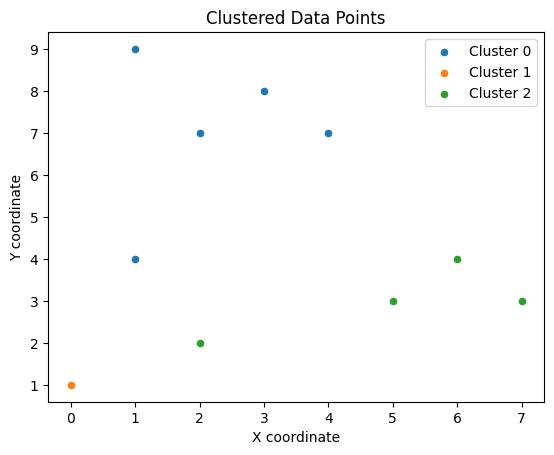

In [52]:
'''
To plot points using different colors for each cluster, you can use libraries such as matplotlib or seaborn, 
which offer flexibility in customizing plots. Here's a basic approach using matplotlib, assuming you have 
an array of data points X (with dimensions n by 2 for simplicity, where n is the number of points, and each 
point has two coordinates) and a corresponding array of cluster labels labels for each point in X. 
The cluster labels are mapped into an array where each element corresponds to the cluster of the 
respective point in X.
'''
import numpy as np
import matplotlib.pyplot as plt

# Unique labels to identify the clusters
unique_labels = np.unique(labels)

# Plot each cluster with a different color. The loop iterates through each unique cluster 
# label, selects the points belonging to that cluster from X, and plots them with a unique 
# color automatically chosen by matplotlib. The label parameter in plt.scatter is used 
# to assign a label to each cluster for the legend.
for label in unique_labels:
    # Select all points that belong to the current cluster
    cluster_points = X[labels == label]
    
    # Plot the points with a different color and label
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=20)

# Add legend to the plot to differentiate clusters
plt.legend()

# Add title and labels for clarity
plt.title('Clustered Data Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Display the plot
plt.show()


### Examples of Spectral Clustering Applications

- **Image Segmentation**: Spectral clustering can be used to segment an image into regions based on the similarity of colors or textures. This is particularly useful in computer vision for object and boundary detection.

- **Social Network Analysis**: It can help identify communities within social networks by finding clusters of users that are more closely connected to each other than to the rest of the network.

- **Bioinformatics**: In gene expression data analysis, spectral clustering can be used to identify groups of genes that exhibit similar expression patterns, which may indicate a shared role in cellular processes.

Spectral clustering is powerful because it can identify complex cluster structures that traditional clustering algorithms might not detect. However, it also has its limitations, such as sensitivity to the choice of similarity measure and scalability issues with very large datasets.

### A Simple Example

First of all let's have a look to a simple example of spectral clustering using Python's scikit-learn library. This example will create a synthetic dataset with two moons shapes, which are not linearly separable, to demonstrate how spectral clustering can effectively identify the clusters.

First, ensure you have scikit-learn and matplotlib installed for this example.

Now, here's the Python code for spectral clustering...

In [53]:
import warnings
warnings.filterwarnings('ignore')

We first generate a synthetic dataset using `make_moons` from `scikit-learn`, which creates two interleaving half circles (moons) that are difficult to separate using linear methods.

In [54]:
# Generate a synthetic dataset with two moons shape
X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

We then apply `SpectralClustering` from `scikit-learn`. We specify `n_clusters=2` because we know there are two groups. The `affinity='nearest_neighbors'` parameter tells the algorithm **to use the nearest neighbors approach to construct the affinity matrix, which represents the graph**. The `assign_labels='kmeans'` parameter specifies that k-means is used in the final step to assign points to clusters based on the spectral embedding.

In [55]:
# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
y_sc = sc.fit_predict(X)

Finally, we plot the original dataset and the clustering result. The two plots show how spectral clustering effectively separates the two moons based on their shape, not relying on their linear separability.

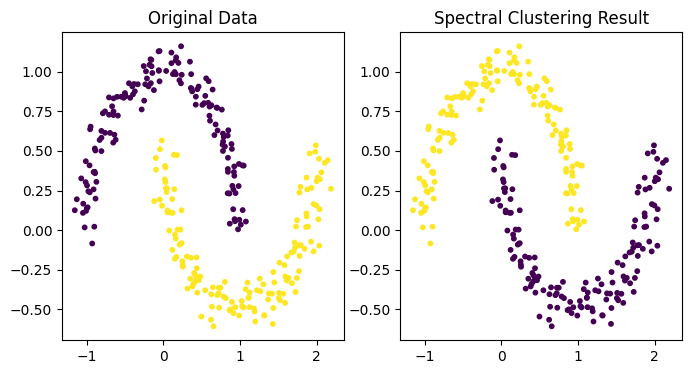

In [56]:
# Plotting the results
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis', label='Original')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_sc, s=10, cmap='viridis')
plt.title('Spectral Clustering Result')

#plt.legend()
plt.show()

### Comparison with other methods

Below is a Python code that reproduces the example comparing K-Means and Spectral Clustering on a synthetic dataset with two concentric circles. This dataset poses a challenge for traditional clustering algorithms like K-Means but is well-suited for Spectral Clustering due to its ability to handle complex cluster shapes.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, SpectralClustering

# Data Generation: make_circles from sklearn.datasets creates a dataset with two concentric circles.
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

# Spectral Clustering: SpectralClustering, also from sklearn.cluster, is used with the nearest_neighbors 
# affinity to better capture the dataset's structure. The n_neighbors parameter is set to 10 to define 
# the local neighborhood size for the graph construction.
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
y_spectral = spectral.fit_predict(X)

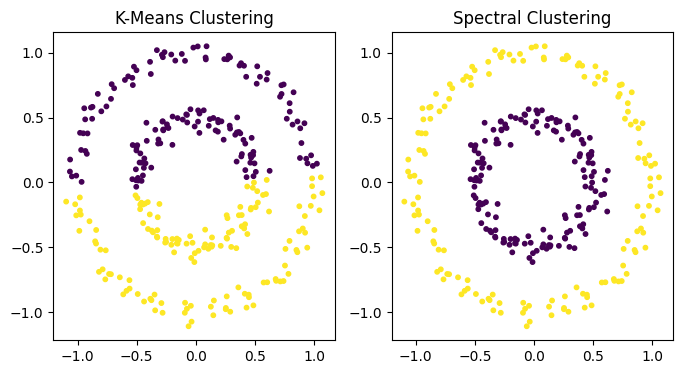

In [58]:
# Plotting the results
plt.figure(figsize=(8, 4))

# K-Means Result
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
plt.title('K-Means Clustering')

# Spectral Clustering Result
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_spectral, s=10, cmap='viridis')
plt.title('Spectral Clustering')

plt.show()

- **K-Means Clustering**: The left plot shows the result of applying K-Means to the dataset. K-Means assumes clusters are convex and isotropic, which leads to a poor clustering outcome for this particular shape of data. It tries to partition the data into two groups based on distance to the cluster centroids, which doesn't work well for concentric circles.

- **Spectral Clustering**: The right plot displays the outcome of spectral clustering. This technique, which uses the nearest neighbors to construct a graph representation of the dataset, effectively captures the essence of the two circles and correctly identifies the two clusters. Spectral clustering does not assume any particular shape for the clusters, allowing it to handle this complex structure successfully.

This example demonstrates the strength of spectral clustering in dealing with datasets where the clusters are not linearly separable or have unusual shapes, making it a powerful tool for real-world data analysis challenges where traditional clustering methods fall short.

Another advantage of ***Spectral Clustering*** is that it can handle clusters with varying shapes, sizes, and densities. For example, let’s look at the composite dataset below. The points are drawn from an elliptical cluster and two additional concentric circles with some random noise:

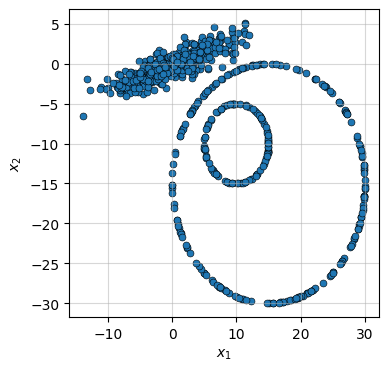

In [60]:
def compound_data(random_seed=0):
    random_state = np.random.RandomState(random_seed)
    
    # Generate the three clusters    
    
    # 1. Main elliptical cluster
    x1 = random_state.normal(0, 5, 400)
    y1 = x1 / 3 + random_state.normal(0, 1, 400)

    # 2. Small circle cluster
    angle2 = random_state.uniform(0, 2 * np.pi, 100)
    x2 = 5 * np.cos(angle2) + 10
    y2 = 5 * np.sin(angle2) - 10

    # 3. Larger circle cluster
    angle3 = random_state.uniform(0, 2 * np.pi, 200)
    x3 = 15 * np.cos(angle3) + 15
    y3 = 15 * np.sin(angle3) - 15

    return np.vstack((np.hstack((x1, x2, x3)), np.hstack((y1, y2, y3)))).T

X = compound_data()
plot_data(X)

In [61]:
def plot_clusters(X, labels):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

Text(0.5, 1.0, 'Spectral clustering')

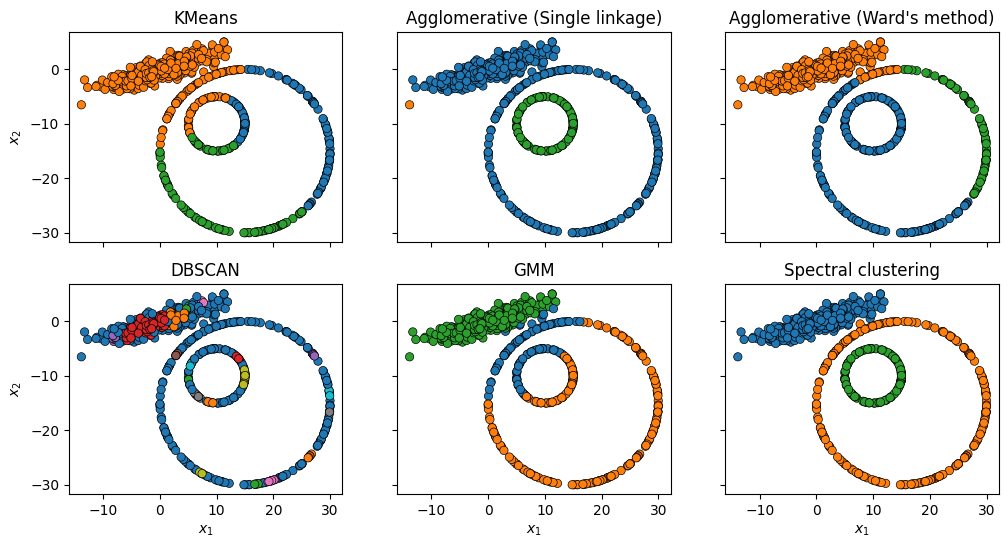

In [62]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6))

plt.sca(axes[0, 0])
kmeans = KMeans(n_clusters=3, random_state=0) 
labels = kmeans.fit_predict(X)
plot_clusters(X, labels)
plt.title('KMeans')

plt.sca(axes[0, 1])
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = agg.fit_predict(X)
plot_clusters(X, labels)
plt.title('Agglomerative (Single linkage)')

plt.sca(axes[0, 2])
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X)
plot_clusters(X, labels)
plt.title('Agglomerative (Ward\'s method)')

plt.sca(axes[1, 0])
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)
plot_clusters(X, labels)
plt.title('DBSCAN')

plt.sca(axes[1, 1])
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(X)
plot_clusters(X, labels)
plt.title('GMM')

plt.sca(axes[1, 2])
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0) 
labels = sc.fit_predict(X)
plot_clusters(X, labels)
plt.title('Spectral clustering')

#plt.savefig('figures/compound_clustering_comparison.pdf')

### Conclusions

**Advantages of Spectral Clustering**:

- Scalability: Spectral clustering can handle large datasets and high-dimensional data, as it reduces the dimensionality of the data before clustering.

- Flexibility: Spectral clustering can be applied to non-linearly separable data, as it does not rely on traditional distance-based clustering methods.

- Robustness: Spectral clustering can be more robust to noise and outliers in the data, as it considers the global structure of the data, rather than just local distances between data points.

**Disadvantages of Spectral Clustering**:

- Complexity: Spectral clustering can be computationally expensive, especially for large datasets, as it requires the calculation of eigenvectors and eigenvalues.

- Model selection: Choosing the right number of clusters and the right similarity matrix can be challenging and may require expert knowledge or trial and error.

## Reference and Credits

[1] V. Gandhi, ["Spectral Clustering - Detailed Explanation"](https://www.kaggle.com/code/vipulgandhi/spectral-clustering-detailed-explanation)

[2] Roi Yehoshua, ["Spectral Clustering: Step-by-step derivation of the spectral clustering algorithm including an implementation in Python"](https://medium.com/@roiyeho/spectral-clustering-50aee862d300)

[3] A.Y. Ng, M.I. Jordan, Y. Weiss (2002). On spectral clustering: Analysis and an algorithm, Advances in neural information processing systems, pp. 849– 856.

[4] U. von Luxburg (2007), A Tutorial on Spectral Clustering, Statistics and computing, 17, 395–416.

[5] Lanczos, C. (1950). An iteration method for the solution of the eigenvalue problem of linear differential and integral operators, Journal of Research of the National Bureau of Standards. 45 (4): 255–282.

[6] Stoer, M., & Wagner, F. (1997). A simple min-cut algorithm. Journal of the ACM (JACM), 44(4), 585–591.

[7] Hagen, L., & Kahng, A. B. (1992). New spectral methods for ratio cut partitioning and clustering. IEEE transactions on computer-aided design of integrated circuits and systems, 11(9), 1074–1085.

[8] Fleshman, W. - ["Spectral Clustering Foundation and Application"](https://towardsdatascience.com/spectral-clustering-aba2640c0d5b), Published in Towards Data Science Feb 21, 2019.





## Exercises

### Credit Card Data Clustering (Kaggle)

The below steps demonstrate how to implement Spectral Clustering using Sklearn. The data for the following steps is the Credit Card Data which can be downloaded from Kaggle. 

**Step 1: Loading and Cleaning the Data**

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [108]:
# Loading the data
X = pd.read_csv('./data/CC_GENERAL.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)

X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Step 2: Preprocessing the data to make the data visualizable**

In [109]:
# Preprocessing the data to make it visualizable

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()

,P1,P2
0,-0.489949,-0.679977
1,-0.519099,0.544825
2,0.330633,0.268876
3,-0.481657,-0.097606
4,-0.563511,-0.482507


**Step 3: Building the Clustering models and Visualizing the Clustering** 

In the below steps, two different Spectral Clustering models with different values for the parameter `affinity`. You can read about the documentation of the Spectral Clustering class [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). a) affinity = `rbf` 

In [110]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

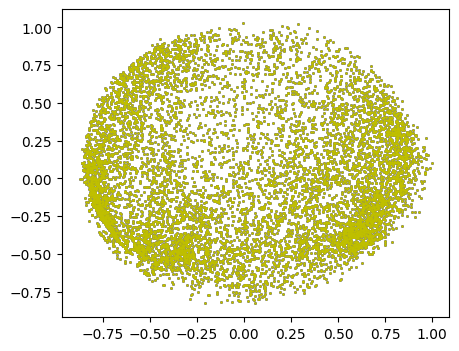

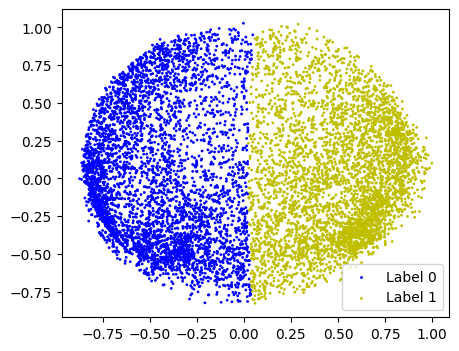

In [111]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot
plt.figure(figsize =(5, 4))
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b', s=1);
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y', s=1);

plt.figure(figsize =(5, 4))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec, s=1)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

b) affinity = `nearest_neighbors` 

In [112]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')

# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

**Step 5: Evaluating the performances**

In [113]:
# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']

# List of Silhouette Scores
s_scores = []

# Evaluating the performance
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))

print(s_scores)

[0.05300611480757429, 0.05674061741630607]


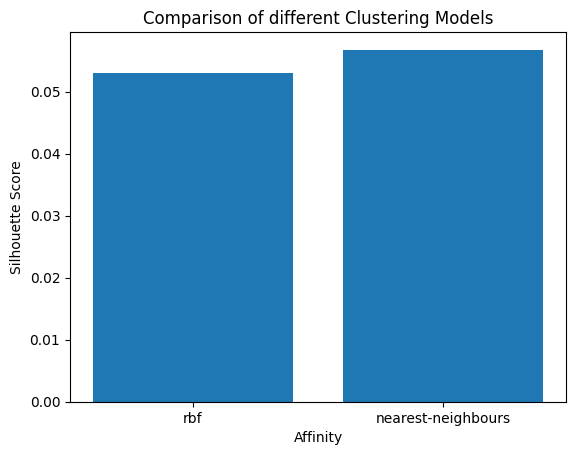

In [114]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

## Appendix

### More on Graph

Let’s use the following undirected graph as a running example:

<center>
    
<img src="./pics/ch-05-01-08.jpg">
</center>

This graph has 10 nodes and 12 edges. It also has two connected components {0,1,2,8,9} and {3,4,5,6,7}. A connected component is a maximal subgraph of nodes which all have paths to the rest of the nodes in the subgraph.

**Adjacency Matrix**

We can represent our example graph as an adjacency matrix, where the row and column indices represent the nodes, and the entries represent the absence or presence of an edge between the nodes. The adjacency matrix for our example graph looks like this:

In [115]:
#A = np.array([
#  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
#  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
#  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
#  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
#  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
#  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [86]:
# Load the data into a NumPy array
A = np.loadtxt('graph-matrix.csv', delimiter=';')

# Print the loaded matrix
print(A)

[[0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]]


In the matrix, we see that row 0, column 1 has a value of $1$. That means that there is an edge connecting node 0 with node 1. If the edges were weighted, the weights of the edges would go in this matrix instead of just 1s and 0s. Since our graph is undirected, the entries for row $i$, col $j$ will be equal to the entry at row $j$, col $i$. The last thing to notice is that the diagonal of this matrix is all $0$, since none of our nodes have edges to themselves.

**Degree Matrix**

As we have seen, the degree of a node is how many edges connect to it. In a directed graph we could talk about in-degree and out-degree, but in this example we just have degree since the edges go both ways. Looking at our graph, we see that node 0 has degree 4, since it has 4 edges. We could also get the degree by taking the sum of the node’s row in the adjacency matrix.

The degree matrix is a diagonal matrix where the value at entry $(i, i)$ is the degree of node $i$. Let’s find the degree matrix for our example:

In [87]:
D = np.diag(A.sum(axis=1))
print(D)

[[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


First, we took the sum across axis 1 (the rows) of our adjacency matrix, and then we put those values into a diagonal matrix. From the degree matrix, we can easily see that nodes 0 and 5 have 4 edges, while the rest of the nodes have only 2.

**Graph Laplacian**

Now we’re going to calculate the Graph Laplacian. The Laplacian is just another matrix representation of a graph. It has several beautiful properties, which we will take advantage of for spectral clustering. To calculate the normal Laplacian (there are several variants), we just subtract the adjacency matrix from our degree matrix:

In [88]:
L = D-A
print(L)

[[ 4. -1. -1.  0.  0.  0.  0.  0. -1. -1.]
 [-1.  4. -1.  0.  0.  0.  0.  0. -1. -1.]
 [-1. -1.  5. -1.  0.  0.  0.  0. -1. -1.]
 [ 0.  0. -1.  5. -1. -1. -1. -1.  0.  0.]
 [ 0.  0.  0. -1.  4. -1. -1. -1.  0.  0.]
 [ 0.  0.  0. -1. -1.  4. -1. -1.  0.  0.]
 [ 0.  0.  0. -1. -1. -1.  4. -1.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1.  4.  0.  0.]
 [-1. -1. -1.  0.  0.  0.  0.  0.  4. -1.]
 [-1. -1. -1.  0.  0.  0.  0.  0. -1.  4.]]


In [89]:
# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
vals

array([-3.33066907e-16,  2.98437881e-01,  5.00000000e+00,  5.00000000e+00,
        5.00000000e+00,  5.00000000e+00,  5.00000000e+00,  5.00000000e+00,
        5.00000000e+00,  6.70156212e+00])

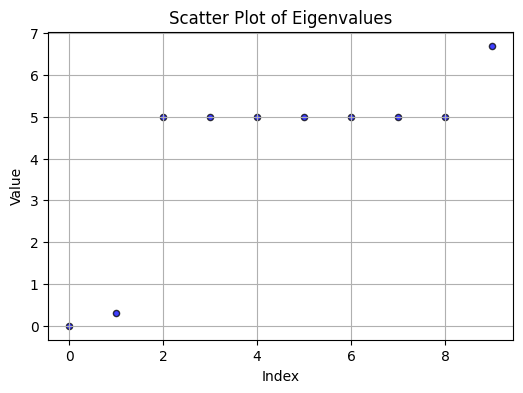

In [90]:
# Use the index of the array as the x-axis
x_axis = np.arange(len(vals))
# Creating the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(x_axis, vals, color='blue', s=20, edgecolor='black', alpha=0.75)
# Adding title and labels
plt.title('Scatter Plot of Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Value')
# Show grid for better readability
plt.grid(True)
# Display the plot
plt.show()

In [128]:
# kmeans on first three vectors with nonzero eigenvalues
kmeans = KMeans(n_clusters=3)
kmeans.fit(vecs[:,1:4])
colors = kmeans.labels_

print("Clusters:", colors)

Clusters: [1 1 1 0 1 1 1 1 2 1]


As we have see, the eigenvectors associated with the smallest non-zero eigenvalues capture the most significant structure of the data with respect to the graph's connectivity. By partitioning the data based on these eigenvectors, spectral clustering seeks to identify clusters that minimize intra-cluster connections while maximizing inter-cluster connections. Let's break it down for more intuitive understanding:

1. **Graph's Connectivity**: Imagine your dataset as a network or graph, where each data point is a node, and the connections (edges) between nodes represent some form of similarity or relationship (e.g., how close or similar two points are). In this network, you're looking to find groups (clusters) of nodes that are more closely connected to each other than to nodes outside their group.

2. **Eigenvectors and Eigenvalues**: Without diving deep into the mathematical details, eigenvalues and eigenvectors come from linear algebra and are properties of matrices, including the Laplacian matrix, which is derived from the graph of your data. Each eigenvalue has a corresponding eigenvector. The eigenvalues give you a sense of the "spread" or "spectrum" of the graph in various dimensions, and the eigenvectors give you the direction of these dimensions.

3. **Smallest Non-Zero Eigenvalues**: The smallest non-zero eigenvalues (and their eigenvectors) are special because they reveal the least obvious but most meaningful ways to "cut" or divide the graph. Why not the absolute smallest, which is zero? Because the zero eigenvalue corresponds to the overall connectedness of the graph and doesn't help to distinguish between different groups. It's like saying, "everything is connected," which we already know.

4. **Capturing the Most Significant Structure**: The eigenvectors associated with these small but non-zero eigenvalues essentially tell us how we can view the data to see its groups most clearly. Think of it as finding the right angle to hold a cut gemstone so that its internal structure and the way it splits light become apparent. These eigenvectors help illuminate the underlying structure of the data in terms of connectivity.

5. **Partitioning Based on Eigenvectors**: By using these special eigenvectors, spectral clustering effectively finds the best way to split the graph into clusters. Each cluster is tightly knit internally (minimizing intra-cluster connections, meaning the nodes within a cluster are closely related), and there's clear separation between different clusters (maximizing inter-cluster connections, meaning the clusters themselves are distinct and not closely connected).

**Intuitive Thought**: Imagine you're at a large social gathering where some people are friends, family, or colleagues, forming natural groups based on their relationships. If you wanted to organize everyone into these groups without knowing their relationships, you might observe who talks to whom and how groups form during the event. The process of spectral clustering is akin to observing these interactions (graph's connectivity) and finding the least noticeable yet most telling signs (smallest non-zero eigenvalues and their eigenvectors) of how to naturally divide the room into its social circles (clusters). This method ensures that within each circle, connections are strong and abundant, while between circles, interactions are fewer, highlighting the distinct groups present at the gathering.

In [71]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np

# create the data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# use the nearest neighbor graph as our adjacency matrix
A = kneighbors_graph(X, n_neighbors=5).toarray()
#print(A)
 
# create the graph laplacian
D = np.diag(A.sum(axis=1))
L = D-A

# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# use Fiedler value to find best cut to separate data
clusters = vecs[:,1] > 0

In [55]:
# Separate points based on labels
XP = X[clusters]
XN = X[~clusters]

print(len(XP))
print(len(XN))

250
250


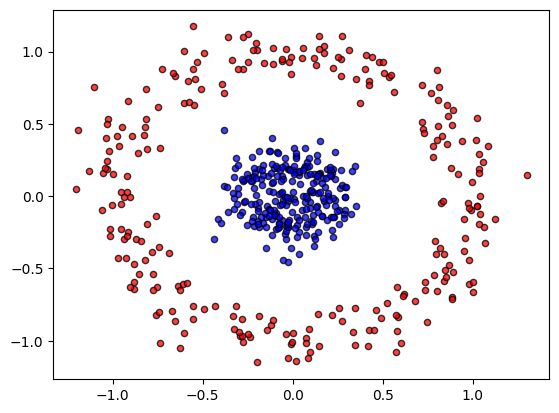

In [56]:
plt.scatter(XP[:,0], XP[:,1], color='blue', s=20, edgecolor='black', alpha=0.75)
plt.scatter(XN[:,0], XN[:,1], color='red', s=20, edgecolor='black', alpha=0.75)

### Triangular Synthetic Data Generator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangle_points(num_points):
    # Vertices of the triangle (for example, equilateral centered at origin)
    vertices = np.array([[0, 1], [-0.866, -0.5], [0.866, -0.5]])

    # Generate random barycentric coordinates
    # Ensure that the sum of the three weights is 1 for each point
    weights = np.random.rand(num_points, 3)
    weights /= weights.sum(axis=1)[:, np.newaxis]

    # Convert barycentric coordinates to Cartesian coordinates
    points = weights @ vertices

    return points

# Number of points to generate
num_points = 1000

# Generate points
points = generate_triangle_points(num_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], s=5)
plt.title('Synthetic Dataset in the Shape of a Triangle')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')  # Equal aspect ratio ensures that the triangle is displayed correctly
plt.show()


### Why should we use spectral clustering?

Text(0.5, 1.0, 'Label returned by KMeans')

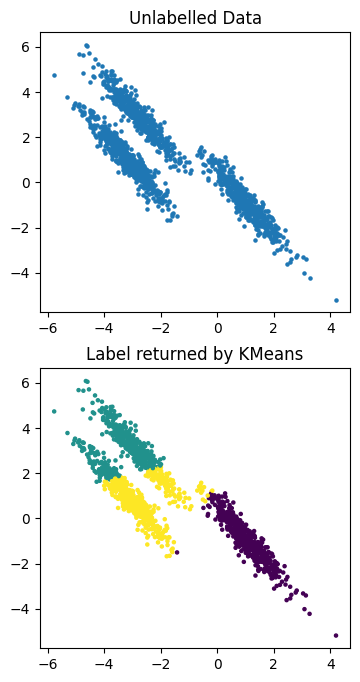

In [98]:
n_samples    = 1500
random_state = 170

X, y = make_blobs(n_samples = n_samples, random_state = random_state)
# Anisotropi distributed data
transformation = [[0.6083, - 0.6366], [-0.4088, 0.8525]]

#X_aniso = X
X_aniso = np.dot(X, transformation)

plt.figure(figsize=(4,8))

plt.subplot(211)
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=5)
plt.title("Unlabelled Data")

y_pred=KMeans(n_clusters=3, random_state=random_state, n_init='auto').fit_predict(X_aniso)

plt.subplot(212)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, s=5)
plt.title("Label returned by KMeans")